In [13]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [14]:
# Load the image 
img = cv2.imread('../image/faces.jpg')

#cv2.imshow('face',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [15]:
faceProto ='../haarcascade/opencv_face_detector.pbtxt'
faceModel = '../haarcascade/opencv_face_detector_uint8.pb'

faceNet= cv2.dnn.readNet(faceModel,faceProto)

In [16]:
# extract blob
blob = cv2.dnn.blobFromImage(img,1,(300,300),(104,177,123),swapRB=False)

In [17]:
# set the blob as input
faceNet.setInput(blob)

# run the model
detections = faceNet.forward()

In [18]:
detections.shape

(1, 1, 200, 7)

In [19]:
print(img.shape)

(700, 960, 3)


[133  87 361 437]
[402 116 646 482]
[728 101 929 375]


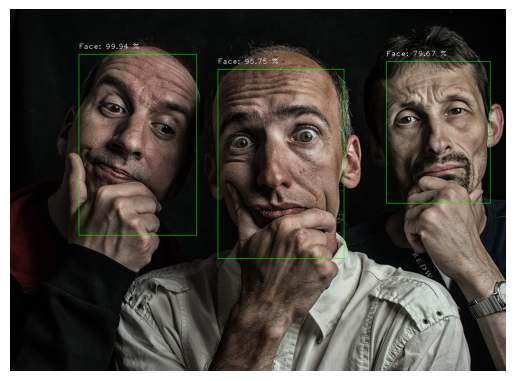

In [20]:
h,w = img.shape[:2]
for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2]
    if confidence >= 0.5:
        #print(confidence)
        # bounding box (3:7)
        box = detections[0,0,i,3:7]# normalized bounding box values
        box = box*np.array([w,h,w,h])
        box = box.astype(int)
        print(box)
        startx,starty,endx,endy = box
        #draw the rectangle
        cv2.rectangle(img,(startx,starty),(endx,endy),(0,255,0))
        
        # put text 
        text = 'Face: {:.2f} %'.format(confidence*100)
        cv2.putText(img,text,(startx,starty-10),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),)
        
# Diplay window
#cv2.imshow('face dectect',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


